# 作業2

## Draw Random Numbers from Uniform Distributions

### Write code to draw a set of 10,000 random numbers that is uniformly distributed in (-2,3). 
 - Hint: Stretch $U(0,1)$ to fit the bound of $U(-2,3)$.
 
### What are the theoretical mean and standard deviation of the distribution $U(-2,3)$ ?
 
### Show the mean and the standard deviation of the set of random numbers you've drawn. 

In [34]:
# Package
using Random, Plots, Statistics

## 1. use rand() function to generate U(0,5)
random_numbers = rand(10000)*5

# Minus 2 to get U(-2,3)
random_numbers = random_numbers .- 2

plot(random_numbers)

## 2. theoretical mean and standard deviation
standard = sqrt(25/12)
println("theoretically, the mean is 1/2")
println("theoretically, the standard deviation is ", standard)

## 3. Show the mean and standard deviation of the random_numbers
mean_value = mean(random_numbers)
variance_value = var(random_numbers)
standard_value = sqrt(variance_value)

# print the resulsts
println("The mean of random_numbers from U(-2,3) is ", mean_value)
println("The standard deviation of random_numbers from U(-2,3) is ", standard_value)


theoretically, the mean is 1/2
theoretically, the standard deviation is 1.4433756729740645
The mean of random_numbers from U(-2,3) is 0.5045921347934703
The standard deviation of random_numbers from U(-2,3) is 1.445323756918012


## Draw Random Numbers from Normal Distributions

### Use `randn()` to draw a $1000\times 2$ matrix of random numbers from $N(2,3)$ (a normal distribution with mean=2 and variance=3). Use `mean()` and `var()` to show that the empirical mean and variance are close to the theoretical values.
- Hint: `randn()` generates N(0,1) random variables; you have to scale it to the appropriate mean and variance.
- Hint: For constants `a` and `b`: $x \sim N(\mu, \sigma^2)$, then $a*x \sim N(a*\mu, \ a^2 \sigma^2)$ and $x+b \sim N(\mu+b, \ \sigma^2)$.

### Use `rand()` to draw a $1000\times 2$ matrix of random numbers from $N(2,3)$. Use `mean()` and `var()` to show that the empirical mean and variance are close to the theoretical values.
- Hint: `rand()` could take distributions as arguments, as we've shown in the class.

In [39]:
using Statistics
using Distributions

### Use randn() function ###
# draw a 1000 x 2 matrix from N(2,3)
random_matrix = randn(1000, 2)

# 缩放随机数以符合 N(2,3) 分布
scaled_matrix = sqrt(3) * random_matrix .+ 2

# 计算随机数的均值和方差
empirical_mean = mean(scaled_matrix, dims=1)
empirical_variance = var(scaled_matrix, dims=1)

# 打印结果
println("the empirical means are: ", empirical_mean)
println("the empirical variances are: ", empirical_variance)

### Use rand() function ###
# draw a 1000 x 2 matrix from N(2,3)
random_matrix_1 = rand(Normal(2, sqrt(3)), 1000, 2)

# 计算随机数的均值和方差
empirical_mean_1 = mean(random_matrix_1, dims=1)
empirical_variance_1 = var(random_matrix_1, dims=1)

# 打印结果
println("the empirical means (from `rand` function) are: ", empirical_mean_1)
println("the empirical variances (from `rand` function) are: ", empirical_variance_1)



the empirical means are: [1.9909575880641537 2.043526115520693]
the empirical variances are: [2.8569062689833253 3.2583558887645316]
the empirical means (from `rand` function) are: [1.9575345426890969 2.0437266105214493]
the empirical variances (from `rand` function) are: [3.1071128296971455 3.2227344009513232]


## Draw Regression Data: Cross-Sectional Model

Suppose you write your own routine to do fancy estimation on cross-sectional and panel data models. You want to conduct a Monte Carlo analysis to see if the routine works as expected and the returned answer is correct. The first thing you have to do is to generate data with pre-specified parameter values. (So that you could apply your estimation routine to the data and see if the estimated parameter values match the pre-specified (*true*) values.) 

Let's start from the cross-sectional model. The model is:
\begin{aligned} 
  y_i & = \alpha + \beta' x_i + \epsilon_i,\qquad i=1,\ldots,N,\\
  \epsilon_i & \sim N(0, \sigma^2).
\end{aligned}   

There could be more than one $x_i$ variable in the model; let's denote the number of $x_i$ as $\textrm{nof X}$. Write a function to generate data $\{y_i, x_i\}$.The function should allow users to choose values of $\{\alpha, \beta, \sigma^2, \textrm{nof X}, N\}$.
  - Hint: The $x_i$s are assumed (in econometrics) to be fixed and exogenous and therefore the distribution from which they are generated is inconsequential. （前面那句看不懂意思沒關係，重要是下面這句：）You may assume that they are generated from normal distributions.

In [2]:
using Distributions
using Random
Random.seed!(123)

function generate_cross_sectional_data(alpha::Float64, beta::Vector{Float64}, sigma2::Float64, nof_X::Int, N::Int)
    # Draw the x from Normal
    x = rand(Normal(), N, nof_X)
    epsilon = rand(Normal(0, sqrt(sigma2)), N)
    
    # Calculate y_i
    y = alpha .+ x * beta .+ epsilon
    
    return [y,x]
end

# test
alpha = 2.0
beta = [3.0,4.0,5.0,6.0,7.0]
sigma2 = 4.0
nof_X = 3
N = 10

generate_cross_sectional_data(alpha, beta, sigma2, nof_X, N)


DimensionMismatch: DimensionMismatch: second dimension of A, 3, does not match length of x, 5

## Draw Regression Data: Panel Model

Suppose you also want to generate panel data to test your routine. The model is
\begin{aligned}
    y_{it} & = \alpha_i + \beta x_{it} + \epsilon_{it},\qquad i=1,\ldots,N,\ t=1,\ldots,T,\\
   \epsilon_{it} & \sim N(0, \sigma^2).
\end{aligned}   

Here, $i$ is the individual index and $t$ is the time index. For instance, $w_{13}$ means the value of $w$ for the 1st individual at 3rd time period. Assume the above model is the random-effect (RE) panel data model where $\alpha_i \sim N(0,\sigma_a^2)$ is a random variable which is independently distributed from $x_{it}$. Write a function to generate data of $\{y_{it}, x_{it}\}$ with the options of $\{\beta, \sigma^2, \sigma_a^2, \textrm{nofX}, N, T\}$. 

  - Hint: Draw $\alpha_i$ and expand it (`repeat()`) to fill the time periods. Generate $x_{it}$ and $\epsilon_{it}$. Then combine these elements according to the equation to create $y_{it}$.
  - Hint: You don't really need to understand what is RE model to generate the data. Just follow the notation and it should be ok.
  - Hint: `repeat()` would be useful here.
  - Hint: The structure of the dataset should look like the following. Note that $\alpha_i$ is constant within a given $i$ but would change acorss different $i$'s. 


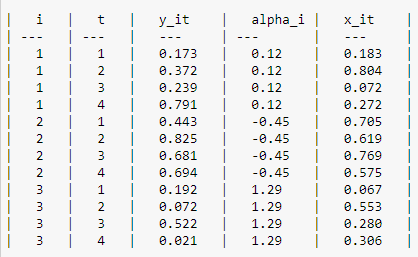




In [1]:
using Distributions
using Random
Random.seed!(123)

function generate_panel_data(beta::Float64, sigma2::Float64, sigma2_alpha::Float64, nof_X::Int, N::Int, T::Int)
    # generate alpha_i, from N(0, sigma2_alpha)
    alpha = rand(Normal(0, sqrt(sigma2_alpha)), N)
    
    # 将每个个体的随机效应扩展到所有时间期间
    alpha_panel = repeat(alpha, 1,T)
    
    # 生成 x_it 数据，假设从标准正态分布中抽取
    x = rand(Normal(), N, T, nof_X)
    
    # 生成误差项 ε_it，假设从 N(0, σ²) 分布中抽取
    epsilon = rand(Normal(0, sqrt(sigma2)), N, T)
    
    # 计算 y_it
    y = alpha_panel .+ x * beta .+ epsilon
    
    return [y,x]
end

# test
alpha = 2.0
beta = 3.0
sigma2 = 4.0
sigma2_alpha = 3.0
nof_X = 1
N = 3
T = 10

generate_panel_data(beta, sigma2, sigma2_alpha, nof_X, N,T)

2-element Vector{Array{Float64, 3}}:
 [-2.30518721701721 -4.735675463486759 … -1.7245038378021795 0.6196762992015336; -1.2070799160738448 -6.877995445523221 … 2.4958043106802132 -7.957968567474445; -4.653336225674783 -4.578188107179938 … -5.217340526388286 2.400684239165747;;;]
 [-0.4169926351649334 -0.4217686643996927 … 0.14837536667608195 0.1707967032029406; 0.28758798062385577 -1.355590621101197 … 1.0096134137351438 -1.7171200973796241; 0.2298186980518676 -0.06193742954771313 … 0.028766636052271793 1.1067814366003583;;;]